In [1]:
from eofs.standard import Eof
import netCDF4 as nc
import numpy as npy
import matplotlib.pyplot as plt
import pandas as pd

from utils.const import LATS_PREC, LONS_PREC, YEAR_E, YEAR_L
from utils.func import csv_to_masked_array as ctm
from utils.func import plot_to_map as ptm

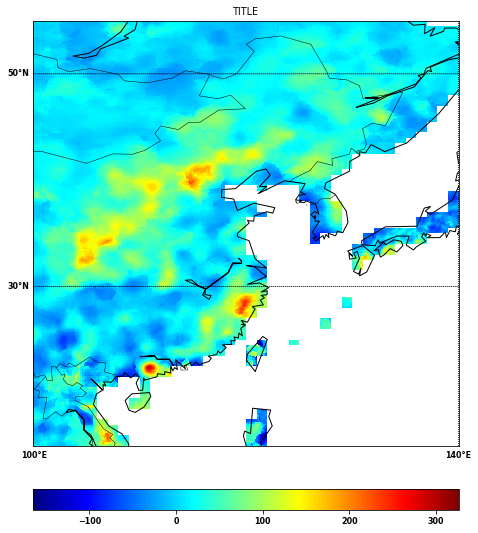

In [2]:
summer_prec = ctm("./precipitation_season_average/summer/1992.csv", type_="prec")
for i in range(1993, 2018):
    y = ctm("./precipitation_season_average/summer/{}.csv".format(i), type_="prec")
    summer_prec = npy.ma.append(summer_prec, y, axis=0)
summer_prec.shape

ptm(LONS_PREC, LATS_PREC, summer_prec[0, :, :]-summer_prec.sum(axis=0)/(2018-1992+1), low_lat=15, up_lat=55, low_lon=100, up_lon=140)

In [3]:
# 进行一个eof的做
coslat = npy.cos(npy.deg2rad(LATS_PREC))
wgts = npy.sqrt(coslat)[..., npy.newaxis]

solver = Eof(summer_prec)

eof = solver.eofsAsCorrelation(neofs=10)
pc = solver.pcs(npcs=10, pcscaling=1)
var = solver.varianceFraction()

In [4]:
var

array([1.41307928e-01, 1.21138835e-01, 1.06914232e-01, 7.95966915e-02,
       5.50398381e-02, 5.01091065e-02, 4.70845076e-02, 4.14009470e-02,
       3.89502573e-02, 3.37134719e-02, 3.17270107e-02, 2.94831896e-02,
       2.65398649e-02, 2.51344809e-02, 2.30608207e-02, 2.14766683e-02,
       1.86822212e-02, 1.77376822e-02, 1.74584112e-02, 1.53142474e-02,
       1.33202751e-02, 1.31949653e-02, 1.11370586e-02, 1.06899628e-02,
       9.78732571e-03, 3.77951162e-31])

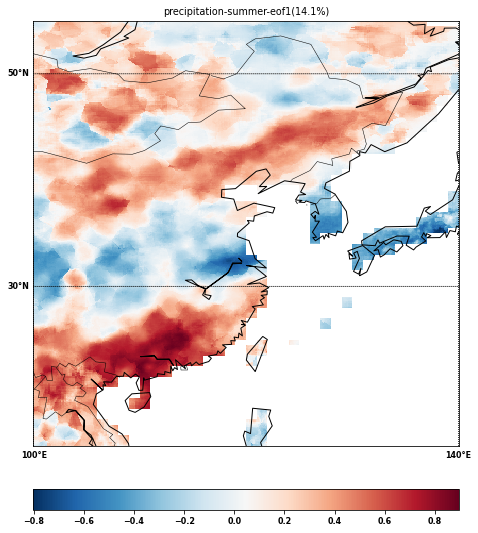

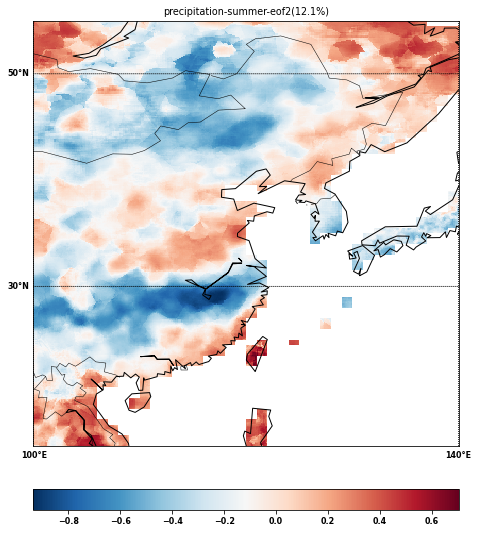

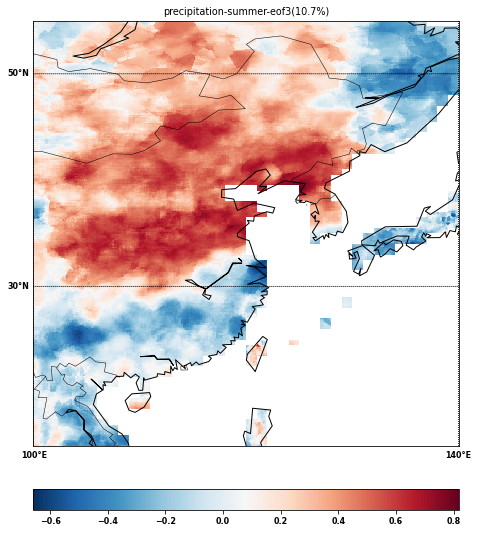

In [11]:
ptm(LONS_PREC, LATS_PREC, eof[0,:,:], low_lat=15, up_lat=55, low_lon=100, up_lon=140, set_cmaps="RdBu_r", fig_title="precipitation-summer-eof1(14.1%)")
ptm(LONS_PREC, LATS_PREC, eof[1,:,:], low_lat=15, up_lat=55, low_lon=100, up_lon=140, set_cmaps="RdBu_r", fig_title="precipitation-summer-eof2(12.1%)")
ptm(LONS_PREC, LATS_PREC, eof[2,:,:], low_lat=15, up_lat=55, low_lon=100, up_lon=140, set_cmaps="RdBu_r", fig_title="precipitation-summer-eof3(10.7%)")

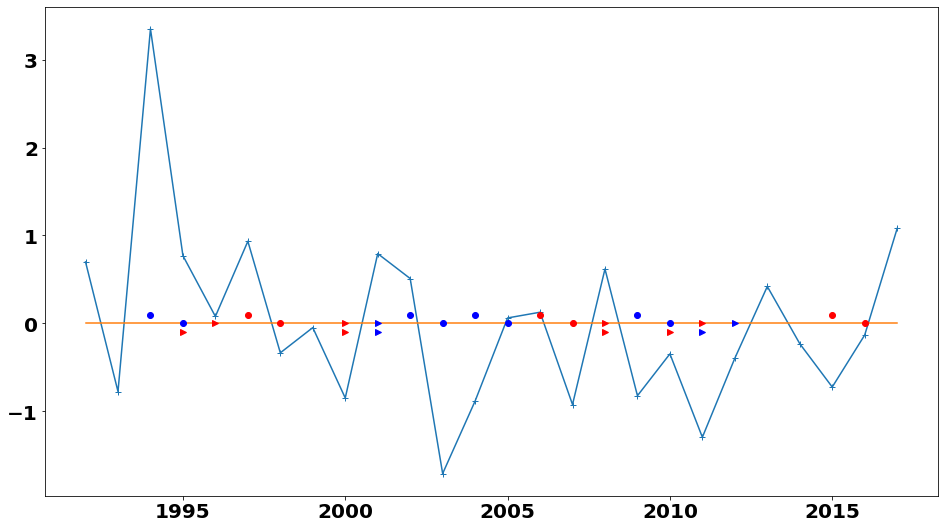

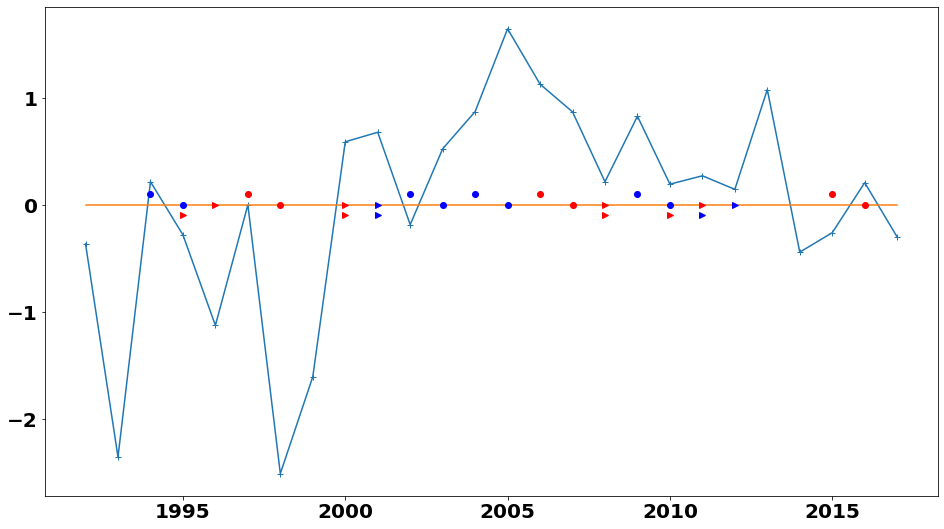

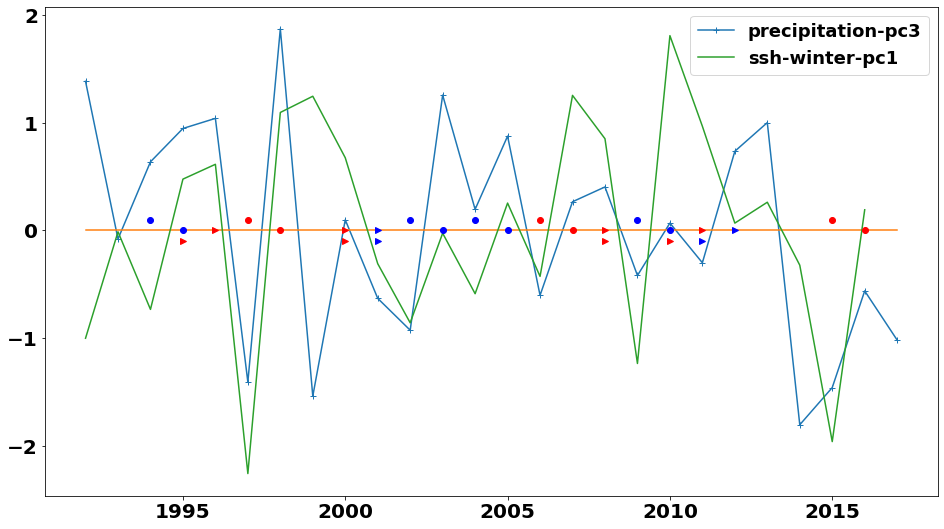

In [16]:
# ptm(LONS_PREC, LATS_PREC, eof[1,:,:], low_lat=15, up_lat=55, low_lon=100, up_lon=140, set_cmaps="RdBu")
plt.figure(figsize=(16, 9))
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.plot(npy.arange(1992, 2018), pc[:,0], "-+")
# plt.plot(npy.arange(1992, 2017), -npy.array([-1.00318762, -0.01425057, -0.73511621,  0.47548067,  0.61314037,       -2.26075622,  1.09490298,  1.24564134,  0.67402784, -0.3103801 ,       -0.85976874, -0.02719216, -0.5893381 ,  0.25290076, -0.42839589,       1.25375321,  0.85077084, -1.23778816,  1.80882442,  0.96674592,       0.06676005,  0.26074703, -0.32428445, -1.96367113,  0.19043392]))
plt.plot([1992, 2017], [0,0])
plt.plot(npy.array([1994,1995,2002,2003,2004,2005,2009,2010]), [0.1,0,0.1,0,0.1,0,0.1,0], "bo")
plt.plot(npy.array([1997,1998,2006,2007,2015,2016]), [0.1,0,0.1,0,0.1,0], "ro")
plt.plot(npy.array([1995,1996,2000,2000,2008,2008,2010,2011]), -npy.array([0.1,0,0.1,0,0.1,0,0.1,0]), "r>")
plt.plot(npy.array([2001,2001,2011,2012]), -npy.array([0.1,0,0.1,0]), "b>")

plt.figure(figsize=(16, 9))
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.plot(npy.arange(1992, 2018), pc[:,1], "-+")
plt.plot([1992, 2017], [0,0])
plt.plot(npy.array([1994,1995,2002,2003,2004,2005,2009,2010]), [0.1,0,0.1,0,0.1,0,0.1,0], "bo")
plt.plot(npy.array([1997,1998,2006,2007,2015,2016]), [0.1,0,0.1,0,0.1,0], "ro")
plt.plot(npy.array([1995,1996,2000,2000,2008,2008,2010,2011]), -npy.array([0.1,0,0.1,0,0.1,0,0.1,0]), "r>")
plt.plot(npy.array([2001,2001,2011,2012]), -npy.array([0.1,0,0.1,0]), "b>")

plt.figure(figsize=(16, 9))
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.plot(npy.arange(1992, 2018), pc[:,2], "-+", label="precipitation-pc3")
plt.plot([1992, 2017], [0,0])
plt.plot(npy.arange(1992, 2017), npy.array([-1.00318762, -0.01425057, -0.73511621,  0.47548067,  0.61314037,
       -2.26075622,  1.09490298,  1.24564134,  0.67402784, -0.3103801 ,
       -0.85976874, -0.02719216, -0.5893381 ,  0.25290076, -0.42839589,
        1.25375321,  0.85077084, -1.23778816,  1.80882442,  0.96674592,
        0.06676005,  0.26074703, -0.32428445, -1.96367113,  0.19043392]), label="ssh-winter-pc1")
plt.plot(npy.array([1994,1995,2002,2003,2004,2005,2009,2010]), [0.1,0,0.1,0,0.1,0,0.1,0], "bo")
plt.plot(npy.array([1997,1998,2006,2007,2015,2016]), [0.1,0,0.1,0,0.1,0], "ro")
plt.plot(npy.array([1995,1996,2000,2000,2008,2008,2010,2011]), -npy.array([0.1,0,0.1,0,0.1,0,0.1,0]), "r>")
plt.plot(npy.array([2001,2001,2011,2012]), -npy.array([0.1,0,0.1,0]), "b>")
plt.legend(fontsize=18)

结论
+ 三模态时间序列和冬季SSH的一模态时间序列吻合比较好（大概？）东部型厄尔尼诺峰值年时间序列表现明显负峰。中部型厄尔尼诺结束年表现明显正值，然后是那个不知道哪是界限的反向变化
+ 大面上都是厄尔尼诺拉尼娜分正负降水会对中东更敏感

In [7]:
pc[:,0]

array([ 0.69970024, -0.77347288,  3.34945123,  0.77042446,  0.08004548,
        0.93438433, -0.33386892, -0.04692487, -0.84693524,  0.79387796,
        0.51071256, -1.70609218, -0.88152297,  0.06278305,  0.12780833,
       -0.92148858,  0.61932827, -0.82142621, -0.34551284, -1.2931176 ,
       -0.39485805,  0.42067134, -0.2298808 , -0.72258004, -0.13135384,
        1.07984775])

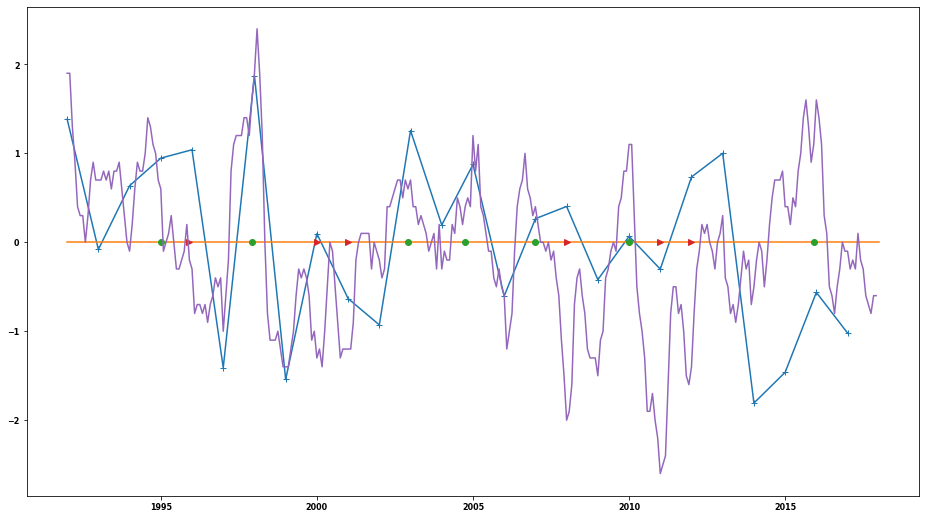

In [8]:
nino = pd.read_csv("nino.csv").values[:,1:].reshape(-1,1)
nino.shape
plt.figure(figsize=(16, 9))
plt.plot(npy.arange(1992, 2018), pc[:,2], "-+")
plt.plot([1992, 2018], [0,0])
plt.plot(npy.array([1994+1, 1997+11/12, 2002+11/12, 2004+9/12, 2006+1, 2009+1, 2014+1+11/12]), [0,0,0,0,0,0,0], 'o')
plt.plot(npy.array([1995+11/12, 1998+2, 2000+1, 2007+1, 2010+1, 2011+1]), [0,0,0,0,0,0], ">")
plt.plot(npy.arange(1992, 2018, 1/12), -nino)

In [9]:

var

array([1.41307928e-01, 1.21138835e-01, 1.06914232e-01, 7.95966915e-02,
       5.50398381e-02, 5.01091065e-02, 4.70845076e-02, 4.14009470e-02,
       3.89502573e-02, 3.37134719e-02, 3.17270107e-02, 2.94831896e-02,
       2.65398649e-02, 2.51344809e-02, 2.30608207e-02, 2.14766683e-02,
       1.86822212e-02, 1.77376822e-02, 1.74584112e-02, 1.53142474e-02,
       1.33202751e-02, 1.31949653e-02, 1.11370586e-02, 1.06899628e-02,
       9.78732571e-03, 3.77951162e-31])